In [2]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import make_blobs, make_circles
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score


warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
##Извлечем информацию из файла

dtrain = pd.read_csv('/home/volkov/hard_mnist/hard_train.txt', header = None, sep = '\\s+')
dlabels = pd.read_csv('/home/volkov/hard_mnist/hard_train_labels.txt', header = None, sep = '\\s+')

In [13]:
X_test = dtrain[10000:11000]
y_test = dlabels[10000:11000]

In [6]:
def knn_algorithm(X_train, y_train, X_test, y_test, N=-1, **kargs):
    X_train = X_train[:N]
    y_train = y_train[:N]
    start = time.time()
    model = KNeighborsClassifier(**kargs)
    model.fit(X_train, y_train)
    fraction_misclassifications = zero_one_loss(y_test, model.predict(X_test))
    end = time.time()
    return(fraction_misclassifications, end-start)

In [17]:
f = open('knn1.txt', 'a')
for j in range(1, 6):
    for i in range(1, 21):
        error_with_time = knn_algorithm(dtrain, dlabels, X_test, y_test, N=2000*j, n_neighbors=i, algorithm='brute')
        f.write(str(i) + ' ' + ' '.join(map(str, error_with_time)) + '\n')
f.close()

In [3]:
f = pd.read_csv('knn1.txt', header = None, sep = '\\s+')
accuracy = 1 - np.array(f[:][1])
k = np.array(f[:][0])
time = np.array(f[:][2])

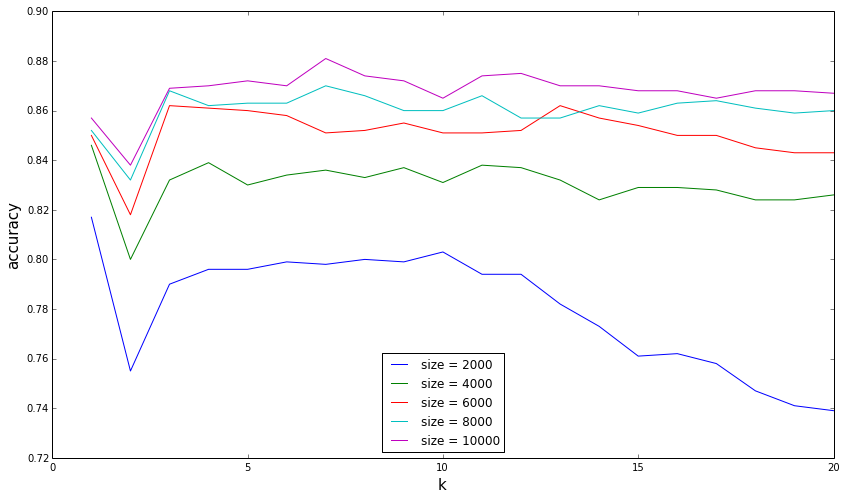

In [4]:
plt.figure(figsize=(14,8))
plt.ylabel("accuracy", fontsize=15)
plt.xlabel("k", fontsize=15)

for i in range(5):
    plt.plot(k[i*20:20*(i+1)], accuracy[i*20:20*(i+1)])
    
plt.legend(['size = 2000', 'size = 4000', 'size = 6000', 'size = 8000','size = 10000'], loc='down left')

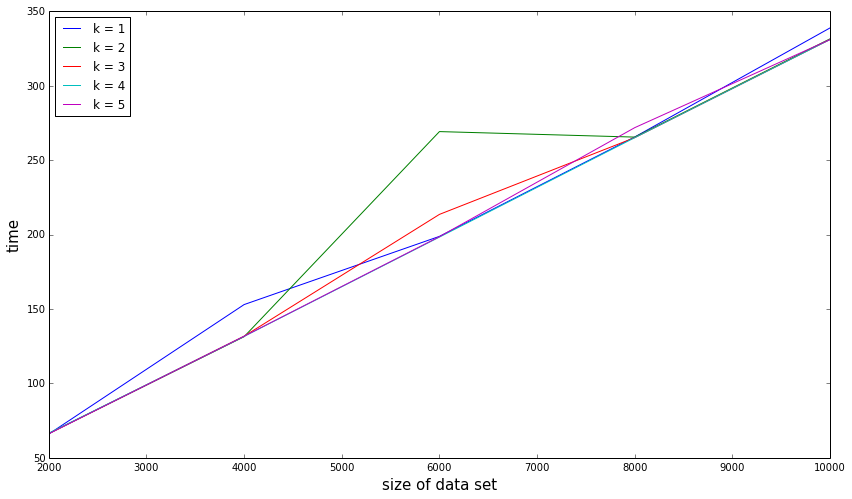

In [5]:
plt.figure(figsize=(14,8))
plt.ylabel("time", fontsize=15)
plt.xlabel("size of data set", fontsize=15)

time_partition = [[time[20*i+j] for i in range(5)] for j in range(5)]
size_of_data_set = [i*2000 for i in range(1, 6)]

for i in range(5):
    plt.plot(size_of_data_set, time_partition[i])
    
plt.legend(['k = 1', 'k = 2', 'k = 3', 'k = 4', 'k = 5'], loc='upper left')